In [1]:
%set_env QXToken=204a10b9d637b323ef6625a048d4ab05a4276e5a6a1907fcaeef3a58b76fa444e2e24d39917a1666980c40b26a508b9ea8288df2fbf0ec302bbe983a072160fd

env: QXToken=204a10b9d637b323ef6625a048d4ab05a4276e5a6a1907fcaeef3a58b76fa444e2e24d39917a1666980c40b26a508b9ea8288df2fbf0ec302bbe983a072160fd


In [2]:
from qiskit_ibm_runtime import QiskitRuntimeService
service=QiskitRuntimeService()

In [3]:
BACKEND=service.least_busy(
    operational=True,
    simulator=False
)
qubits=BACKEND.configuration().coupling_map[1]

PATH_ANSWER=qubits

In [4]:
cmap=BACKEND.configuration().coupling_map

In [20]:
cmap_abriged=cmap[:3]

In [5]:
cmap

[[1, 0],
 [2, 1],
 [3, 2],
 [4, 3],
 [4, 5],
 [4, 15],
 [6, 5],
 [6, 7],
 [7, 8],
 [8, 9],
 [10, 9],
 [10, 11],
 [11, 12],
 [12, 17],
 [13, 12],
 [14, 0],
 [14, 18],
 [15, 22],
 [16, 8],
 [16, 26],
 [17, 30],
 [18, 19],
 [20, 19],
 [20, 33],
 [21, 20],
 [21, 22],
 [22, 23],
 [24, 23],
 [24, 34],
 [25, 24],
 [26, 25],
 [27, 26],
 [28, 27],
 [28, 29],
 [28, 35],
 [30, 29],
 [30, 31],
 [31, 32],
 [32, 36],
 [33, 39],
 [34, 43],
 [35, 47],
 [36, 51],
 [37, 38],
 [39, 38],
 [40, 39],
 [40, 41],
 [41, 53],
 [42, 41],
 [42, 43],
 [43, 44],
 [44, 45],
 [46, 45],
 [46, 47],
 [48, 47],
 [48, 49],
 [50, 49],
 [50, 51],
 [52, 37],
 [52, 56],
 [53, 60],
 [54, 45],
 [54, 64],
 [55, 49],
 [55, 68],
 [56, 57],
 [57, 58],
 [58, 59],
 [58, 71],
 [59, 60],
 [60, 61],
 [62, 61],
 [62, 63],
 [62, 72],
 [63, 64],
 [65, 64],
 [65, 66],
 [67, 66],
 [67, 68],
 [69, 68],
 [69, 70],
 [73, 66],
 [74, 70],
 [74, 89],
 [75, 90],
 [76, 75],
 [77, 71],
 [77, 76],
 [77, 78],
 [79, 78],
 [79, 80],
 [80, 81],
 [81, 72],

In [6]:
coupling_map_tuples = [tuple(pair) for pair in cmap]

# Define PATH_ANSWER (example, needs to be set according to your use case)
PATH_ANSWER = list(sorted(set([qubit for pair in coupling_map_tuples for qubit in pair])))

In [7]:
LAYER_1_ANSWER = []
LAYER_2_ANSWER = []
used_qubits_layer1 = set()
used_qubits_layer2 = set()

# Populate the layers
for pair in coupling_map_tuples:
    if pair[0] in PATH_ANSWER and pair[1] in PATH_ANSWER:
        if pair[0] not in used_qubits_layer1 and pair[1] not in used_qubits_layer1:
            LAYER_1_ANSWER.append(pair)
            used_qubits_layer1.update(pair)
        elif pair[0] not in used_qubits_layer2 and pair[1] not in used_qubits_layer2:
            LAYER_2_ANSWER.append(pair)
            used_qubits_layer2.update(pair)

# Print layers for verification
print("LAYER_1_ANSWER:", LAYER_1_ANSWER)
print("LAYER_2_ANSWER:", LAYER_2_ANSWER)

LAYER_1_ANSWER: [(1, 0), (3, 2), (4, 5), (6, 7), (8, 9), (10, 11), (12, 17), (14, 18), (15, 22), (16, 26), (20, 19), (24, 23), (28, 27), (30, 29), (31, 32), (33, 39), (34, 43), (35, 47), (36, 51), (37, 38), (40, 41), (44, 45), (48, 49), (52, 56), (53, 60), (54, 64), (55, 68), (57, 58), (62, 61), (65, 66), (69, 70), (74, 89), (75, 90), (77, 71), (79, 78), (80, 81), (82, 83), (85, 73), (86, 87), (92, 102), (93, 106), (94, 95), (97, 96), (98, 91), (100, 99), (104, 103), (108, 107), (110, 118), (112, 126), (113, 114), (116, 115), (120, 119), (122, 111), (124, 123)]
LAYER_2_ANSWER: [(2, 1), (4, 3), (6, 5), (7, 8), (10, 9), (11, 12), (14, 0), (17, 30), (18, 19), (20, 33), (21, 22), (24, 34), (26, 25), (28, 29), (32, 36), (39, 38), (41, 53), (42, 43), (46, 45), (48, 47), (50, 49), (52, 37), (56, 57), (58, 59), (60, 61), (62, 63), (65, 64), (67, 66), (69, 68), (74, 70), (76, 75), (77, 78), (79, 80), (81, 72), (83, 92), (85, 84), (87, 88), (94, 90), (95, 96), (97, 98), (100, 110), (101, 102), (

In [23]:
from qc_grader.challenges.qgss_2024 import grade_lab2_ex2
grade_lab2_ex2(LAYER_1_ANSWER, LAYER_2_ANSWER, PATH_ANSWER,backend=BACKEND)

Submitting your answer. Please wait...
Nice work, all your answers look correct!


In [10]:
LAYER_1_ANSWER=coupling_map_tuples

In [11]:
print(f"Path Answer: {PATH_ANSWER}")
print(f"Backend: {BACKEND}")

Path Answer: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126]
Backend: <IBMBackend('ibm_brisbane')>


In [12]:
from qc_grader.challenges.qgss_2024 import grade_lab2_ex1
grade_lab2_ex1(PATH_ANSWER, BACKEND)

Submitting your answer. Please wait...
Nice work, all your answers look correct!


In [13]:
from qiskit import QuantumCircuit

In [14]:
GATE_NAME="cx"

CIRC_1_ANSWER = QuantumCircuit(max(max(LAYER_1_ANSWER, key=lambda x: max(x)))+1)
CIRC_2_ANSWER = QuantumCircuit(max(max(LAYER_2_ANSWER, key=lambda x: max(x)))+1)

In [15]:
for edge in LAYER_1_ANSWER:
    q1, q2 = edge
    if GATE_NAME == 'cx':
        CIRC_1_ANSWER.cx(q1, q2)
    elif GATE_NAME == 'cz':
        CIRC_1_ANSWER.cz(q1, q2)
    elif GATE_NAME == 'ecr':
        CIRC_1_ANSWER.ecr(q1, q2)

In [16]:
for edge in LAYER_2_ANSWER:
    q1, q2 = edge
    if GATE_NAME == 'cx':
        CIRC_2_ANSWER.cx(q1, q2)
    elif GATE_NAME == 'cz':
        CIRC_2_ANSWER.cz(q1, q2)
    elif GATE_NAME == 'ecr':
        CIRC_2_ANSWER.ecr(q1, q2)

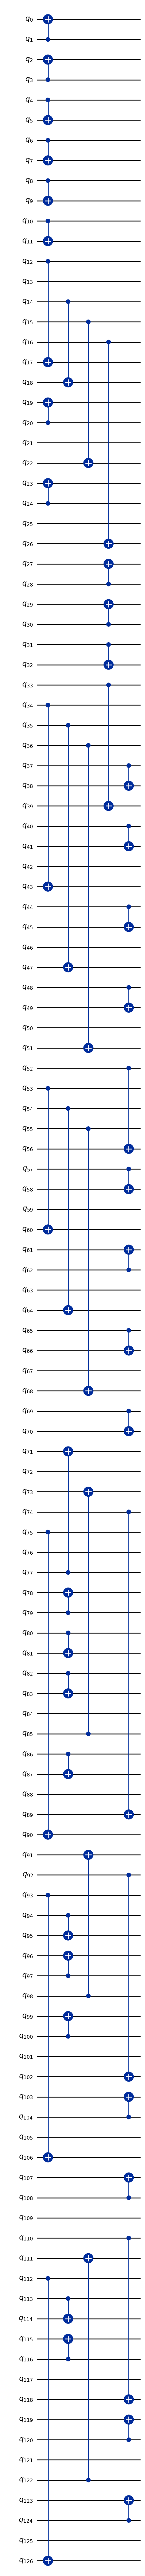

In [38]:
CIRC_1_ANSWER.draw(output="mpl")


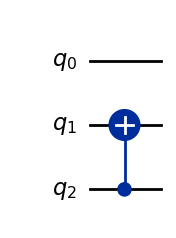

In [32]:
CIRC_2_ANSWER.draw(output="mpl")

In [17]:
from qc_grader.challenges.qgss_2024 import grade_lab2_ex3
grade_lab2_ex3(CIRC_1_ANSWER, LAYER_1_ANSWER, GATE_NAME, BACKEND)
grade_lab2_ex3(CIRC_2_ANSWER, LAYER_2_ANSWER, GATE_NAME, BACKEND)

Submitting your answer. Please wait...
Nice work, all your answers look correct!
Submitting your answer. Please wait...
Nice work, all your answers look correct!


In [18]:
from qiskit.circuit import Parameter
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

def eplg_circuit(num_qubits: int, depth: int, layer: QuantumCircuit, qubits: tuple[int, ...]) -> QuantumCircuit:
    if depth % 2 != 0:
        raise ValueError(f"The depth must be even, got {depth}")

    def parameters():
        _depth = 0
        while True:
            for zi in range(3):
                for q in range(num_qubits):
                    yield Parameter(f"d{_depth}_q{q}_z{zi}")
            _depth += 1
    _parameters = parameters()

    circ = QuantumCircuit(num_qubits)

    def _1q_layer():
        for j in range(3):
            for k in qubits:
                circ.rz(next(_parameters), k)
            if j == 2:
                continue
            circ.sx(qubits)

    for _depth in range(depth // 2):
        circ.barrier(qubits)
        _1q_layer()
        circ.barrier(qubits)
        circ.compose(layer, inplace=True)
    circ.barrier(qubits)
    _1q_layer()
    circ.barrier(qubits)
    
    # Assuming mirroring is fine
    circ = circ.compose(circ.inverse())

    circ.measure_active()

    pm = generate_preset_pass_manager(basis_gates=["ecr", "sx", "rz"], optimization_level=0)
    circ = pm.run(circ)

    circ.metadata["layer_depth"] = depth
    circ.metadata["qubits"] = qubits
    circ.metadata["num_qubits"] = num_qubits

    return circ

In [19]:
example_circuit_1 = eplg_circuit(
    num_qubits=BACKEND.num_qubits,
    depth=4,
    layer=CIRC_1_ANSWER,
    qubits=PATH_ANSWER,
)
example_circuit_2 = eplg_circuit(
    num_qubits=BACKEND.num_qubits,
    depth=4,
    layer=CIRC_2_ANSWER,
    qubits=PATH_ANSWER,
)

In [41]:
example_circuit_1.draw(output="text",fold=-1,idle_wires=False)

░ ┌──────────────┐┌────┐┌──────────────┐┌────┐ ┌──────────────┐ ░ ┌─────────┐ ┌─────────┐┌────┐┌─────────┐┌─────────┐┌──────┐                                          ░ ┌───────────────┐┌────┐┌───────────────┐┌────┐┌───────────────┐ ░ ┌─────────┐ ┌─────────┐┌────┐┌─────────┐┌─────────┐┌──────┐                                          ░ ┌───────────────┐┌────┐┌───────────────┐┌────┐┌───────────────┐ ░  ░ ┌────────────────────┐┌─────────┐┌─────────┐┌────┐┌─────────┐┌─────────┐┌────────────────────┐┌─────────┐┌─────────┐┌────┐┌─────────┐┌─────────┐┌────────────────────┐ ░ ┌─────────┐ ┌─────────┐┌────┐┌─────────┐┌─────────┐┌──────┐                                          ░ ┌────────────────────┐┌─────────┐┌─────────┐┌────┐┌─────────┐┌─────────┐┌────────────────────┐┌─────────┐┌─────────┐┌────┐┌─────────┐┌─────────┐┌────────────────────┐ ░ ┌─────────┐ ┌─────────┐┌────┐┌─────────┐┌─────────┐┌──────┐                                          ░ ┌───────────────────┐ ┌─────────┐┌─────────┐┌────┐┌─────────┐┌─────────┐┌───────────────────┐┌─────────┐┌─────────┐┌────┐┌─────────┐┌─────────┐┌───────────────────┐ ░  ░ ┌─┐         
      q_0: ─░─┤ Rz(d0_q0_z0) ├┤ √X ├┤ Rz(d0_q4_z0) ├┤ √X ├─┤ Rz(d0_q8_z0) ├─░─┤ Rz(π/2) ├─┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ Rz(π/2) ├┤1     ├──────────────────────────────────────────░─┤ Rz(d0_q12_z0) ├┤ √X ├┤ Rz(d0_q16_z0) ├┤ √X ├┤ Rz(d0_q20_z0) ├─░─┤ Rz(π/2) ├─┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ Rz(π/2) ├┤1     ├──────────────────────────────────────────░─┤ Rz(d0_q24_z0) ├┤ √X ├┤ Rz(d0_q28_z0) ├┤ √X ├┤ Rz(d0_q32_z0) ├─░──░─┤ Rz(-1.0*d0_q32_z0) ├┤ Rz(π/2) ├┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ Rz(π/2) ├┤ Rz(-1.0*d0_q28_z0) ├┤ Rz(π/2) ├┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ Rz(π/2) ├┤ Rz(-1.0*d0_q24_z0) ├─░─┤ Rz(π/2) ├─┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ Rz(π/2) ├┤1     ├──────────────────────────────────────────░─┤ Rz(-1.0*d0_q20_z0) ├┤ Rz(π/2) ├┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ Rz(π/2) ├┤ Rz(-1.0*d0_q16_z0) ├┤ Rz(π/2) ├┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ Rz(π/2) ├┤ Rz(-1.0*d0_q12_z0) ├─░─┤ Rz(π/2) ├─┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ Rz(π/2) ├┤1     ├──────────────────────────────────────────░─┤ Rz(-1.0*d0_q8_z0) ├─┤ Rz(π/2) ├┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ Rz(π/2) ├┤ Rz(-1.0*d0_q4_z0) ├┤ Rz(π/2) ├┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ Rz(π/2) ├┤ Rz(-1.0*d0_q0_z0) ├─░──░─┤M├─────────
            ░ ├──────────────┤├────┤├──────────────┤├────┤ ├──────────────┤ ░ ├─────────┴┐└─────────┘└────┘└─────────┘└─────────┘│  Ecr │┌───────┐┌────┐┌────────┐┌────┐┌────────┐ ░ ├───────────────┤├────┤├───────────────┤├────┤├───────────────┤ ░ ├─────────┴┐└─────────┘└────┘└─────────┘└─────────┘│  Ecr │┌───────┐┌────┐┌────────┐┌────┐┌────────┐ ░ ├───────────────┤├────┤├───────────────┤├────┤├───────────────┤ ░  ░ ├────────────────────┤├─────────┤├─────────┤├────┤├─────────┤├─────────┤├────────────────────┤├─────────┤├─────────┤├────┤├─────────┤├─────────┤├────────────────────┤ ░ ├─────────┴┐└─────────┘└────┘└─────────┘└─────────┘│  Ecr │┌───────┐┌────┐┌────────┐┌────┐┌────────┐ ░ ├────────────────────┤├─────────┤├─────────┤├────┤├─────────┤├─────────┤├────────────────────┤├─────────┤├─────────┤├────┤├─────────┤├─────────┤├────────────────────┤ ░ ├─────────┴┐└─────────┘└────┘└─────────┘└─────────┘│  Ecr │┌───────┐┌────┐┌────────┐┌────┐┌────────┐ ░ ├───────────────────┤ ├─────────┤├─────────┤├────┤├─────────┤├─────────┤├───────────────────┤├─────────┤├─────────┤├────┤├─────────┤├─────────┤├───────────────────┤ ░  ░ └╥┘┌─┐      
      q_1: ─░─┤ Rz(d0_q1_z0) ├┤ √X ├┤ Rz(d0_q5_z0) ├┤ √X ├─┤ Rz(d0_q9_z0) ├─░─┤ Rz(-π/2) ├───────────────────────────────────────┤0     ├┤ Rz(π) ├┤ √X ├┤ Rz(2π) ├┤ √X ├┤ Rz(3π) ├─░─┤ Rz(d0_q13_z0) ├┤ √X ├┤ Rz(d0_q17_z0) ├┤ √X ├┤ Rz(d0_q21_z0) ├─░─┤ Rz(-π/2) ├───────────────────────────────────────┤0     ├┤ Rz(π) ├┤ √X ├┤ Rz(2π) ├┤ √X ├┤ Rz(3π) ├─░─┤ Rz(d0_q25_z0) ├┤ √X ├┤ Rz(d0_q29_z0) ├┤ √X ├┤ Rz(d0_q33_z0) ├─░──░─┤ Rz(-1.0*d0_q33_z0) ├┤ Rz(π/2) ├┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ Rz(π/2) ├┤ Rz(-1.0*d0_q29_z0) ├┤ Rz(π/2) ├┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ Rz(π/2) ├┤ Rz(-1.0*d

In [42]:
example_circuit_2.draw(output="text",fold=-1,idle_wires=False)

░ ┌──────────────┐┌────┐┌──────────────┐┌────┐ ┌──────────────┐ ░                                                                                                      ░ ┌───────────────┐┌────┐┌───────────────┐┌────┐┌───────────────┐ ░                                                                                                      ░ ┌───────────────┐┌────┐┌───────────────┐┌────┐┌───────────────┐ ░  ░ ┌────────────────────┐┌─────────┐┌─────────┐┌────┐┌─────────┐┌─────────┐┌────────────────────┐┌─────────┐┌─────────┐┌────┐┌─────────┐┌─────────┐┌────────────────────┐ ░                                                                                                      ░ ┌────────────────────┐┌─────────┐┌─────────┐┌────┐┌─────────┐┌─────────┐┌────────────────────┐┌─────────┐┌─────────┐┌────┐┌─────────┐┌─────────┐┌────────────────────┐ ░                                                                                                      ░ ┌───────────────────┐ ┌─────────┐┌─────────┐┌────┐┌─────────┐┌─────────┐┌───────────────────┐┌─────────┐┌─────────┐┌────┐┌─────────┐┌─────────┐┌───────────────────┐ ░  ░ ┌─┐         
      q_0: ─░─┤ Rz(d0_q0_z0) ├┤ √X ├┤ Rz(d0_q4_z0) ├┤ √X ├─┤ Rz(d0_q8_z0) ├─░──────────────────────────────────────────────────────────────────────────────────────────────────────░─┤ Rz(d0_q12_z0) ├┤ √X ├┤ Rz(d0_q16_z0) ├┤ √X ├┤ Rz(d0_q20_z0) ├─░──────────────────────────────────────────────────────────────────────────────────────────────────────░─┤ Rz(d0_q24_z0) ├┤ √X ├┤ Rz(d0_q28_z0) ├┤ √X ├┤ Rz(d0_q32_z0) ├─░──░─┤ Rz(-1.0*d0_q32_z0) ├┤ Rz(π/2) ├┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ Rz(π/2) ├┤ Rz(-1.0*d0_q28_z0) ├┤ Rz(π/2) ├┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ Rz(π/2) ├┤ Rz(-1.0*d0_q24_z0) ├─░──────────────────────────────────────────────────────────────────────────────────────────────────────░─┤ Rz(-1.0*d0_q20_z0) ├┤ Rz(π/2) ├┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ Rz(π/2) ├┤ Rz(-1.0*d0_q16_z0) ├┤ Rz(π/2) ├┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ Rz(π/2) ├┤ Rz(-1.0*d0_q12_z0) ├─░──────────────────────────────────────────────────────────────────────────────────────────────────────░─┤ Rz(-1.0*d0_q8_z0) ├─┤ Rz(π/2) ├┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ Rz(π/2) ├┤ Rz(-1.0*d0_q4_z0) ├┤ Rz(π/2) ├┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ Rz(π/2) ├┤ Rz(-1.0*d0_q0_z0) ├─░──░─┤M├─────────
            ░ ├──────────────┤├────┤├──────────────┤├────┤ ├──────────────┤ ░ ┌─────────┐ ┌─────────┐┌────┐┌─────────┐┌─────────┐┌──────┐                                          ░ ├───────────────┤├────┤├───────────────┤├────┤├───────────────┤ ░ ┌─────────┐ ┌─────────┐┌────┐┌─────────┐┌─────────┐┌──────┐                                          ░ ├───────────────┤├────┤├───────────────┤├────┤├───────────────┤ ░  ░ ├────────────────────┤├─────────┤├─────────┤├────┤├─────────┤├─────────┤├────────────────────┤├─────────┤├─────────┤├────┤├─────────┤├─────────┤├────────────────────┤ ░ ┌─────────┐ ┌─────────┐┌────┐┌─────────┐┌─────────┐┌──────┐                                          ░ ├────────────────────┤├─────────┤├─────────┤├────┤├─────────┤├─────────┤├────────────────────┤├─────────┤├─────────┤├────┤├─────────┤├─────────┤├────────────────────┤ ░ ┌─────────┐ ┌─────────┐┌────┐┌─────────┐┌─────────┐┌──────┐                                          ░ ├───────────────────┤ ├─────────┤├─────────┤├────┤├─────────┤├─────────┤├───────────────────┤├─────────┤├─────────┤├────┤├─────────┤├─────────┤├───────────────────┤ ░  ░ └╥┘┌─┐      
      q_1: ─░─┤ Rz(d0_q1_z0) ├┤ √X ├┤ Rz(d0_q5_z0) ├┤ √X ├─┤ Rz(d0_q9_z0) ├─░─┤ Rz(π/2) ├─┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ Rz(π/2) ├┤1     ├──────────────────────────────────────────░─┤ Rz(d0_q13_z0) ├┤ √X ├┤ Rz(d0_q17_z0) ├┤ √X ├┤ Rz(d0_q21_z0) ├─░─┤ Rz(π/2) ├─┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ Rz(π/2) ├┤1     ├──────────────────────────────────────────░─┤ Rz(d0_q25_z0) ├┤ √X ├┤ Rz(d0_q29_z0) ├┤ √X ├┤ Rz(d0_q33_z0) ├─░──░─┤ Rz(-1.0*d0_q33_z0) ├┤ Rz(π/2) ├┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ Rz(π/2) ├┤ Rz(-1.0*d0_q29_z0) ├┤ Rz(π/2) ├┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ Rz(π/2) ├┤ Rz(-1.0*d

In [20]:
import numpy as np

from qiskit.primitives.containers.bindings_array import BindingsArray

def get_clifford_rz_samples(
    circ: QuantumCircuit,
    num_samples: int,
    rng: np.random.Generator,
) -> BindingsArray:
    """Uniformly sample the Rz parameters in a `QuantumCircuit`
    from -pi, -pi/2, 0, +pi/2, +pi.
    """

    _allowed_ops = {'rz', 'sx', 'sxdg', 'ecr', 'barrier', 'measure'}
    if (_other := set(circ.count_ops().keys()) - _allowed_ops):
        raise ValueError(f"Circuit must only contain ops: {_allowed_ops}, got {_other}")

    sampled_pars = rng.integers(-2, 3, size=(num_samples, len(circ.parameters))) * (np.pi/2)

    return BindingsArray({
        tuple(circ.parameters): sampled_pars
    })

In [21]:
num_samples = 10
ARRAY_1_ANSWER = get_clifford_rz_samples(
    circ=example_circuit_1,
    num_samples=num_samples,
    rng=np.random.default_rng(42))

In [45]:
from qc_grader.challenges.qgss_2024 import grade_lab2_ex4
grade_lab2_ex4(ARRAY_1_ANSWER, example_circuit_1, num_samples)

Submitting your answer. Please wait...
Nice work, all your answers look correct! 
 Notice that the shape of the BindingsArray is [10], and there are {num_parameters} parameters.


In [23]:
import numpy as np 
from itertools import product 
from qiskit.quantum_info import SparsePauliOp 

In [24]:
def process_fidelity_observable(num_qubits:int,qubits:tuple[int,...])->SparsePauliOp:
    pauli_strings=[]
    for substr in product(["I","Z"],repeat=len(qubits)):
        str=["I"]*num_qubits
        for qi,pi in zip(qubits,substr):
            str[qi]=pi
        pauli_strings.append("".join(str[::-1]))
    return SparsePauliOp(pauli_strings,np.ones(len(pauli_strings))/2**len(qubits))



In [25]:
from qiskit.primitives.containers.observables_array import ObservablesArray

LAYER_1_SUBSYSTEMS = LAYER_1_ANSWER + [(q,) for q in set(PATH_ANSWER) - set(item for sublist in LAYER_1_ANSWER for item in sublist)]
LAYER_2_SUBSYSTEMS = LAYER_2_ANSWER + [(q,) for q in set(PATH_ANSWER) - set(item for sublist in LAYER_2_ANSWER for item in sublist)]

LAYER_1_OBSERVABLES = ObservablesArray([process_fidelity_observable(BACKEND.num_qubits, qubits) for qubits in LAYER_1_SUBSYSTEMS])
LAYER_2_OBSERVABLES = ObservablesArray([process_fidelity_observable(BACKEND.num_qubits, qubits) for qubits in LAYER_2_SUBSYSTEMS])

In [26]:

LAYER_2_OBSERVABLES.shape == (len(LAYER_2_SUBSYSTEMS),)

True

In [27]:
LAYER_1_OBSERVABLES.shape == (len(LAYER_1_SUBSYSTEMS),)

True

In [39]:
rng=np.random.default_rng(42)
num_samples=10
depths=[2,4]

from qiskit.primitives.containers.estimator_pub import EstimatorPub


In [40]:
estimator_pub=[]
for depth in depths:
    for layer, name, observables in [(CIRC_1_ANSWER, "circ_1", LAYER_1_OBSERVABLES), (CIRC_2_ANSWER, "circ_2", LAYER_2_OBSERVABLES)]:
        circ = eplg_circuit(
            num_qubits=BACKEND.num_qubits,
            depth=depth,
            layer=layer,
            qubits=PATH_ANSWER,
        )
        circ.metadata["layer_idx"] = name
        bindings_array = get_clifford_rz_samples(
            circ=circ,
            num_samples=num_samples,
            rng=rng,
        )
        # We need to reshape the `ObservablesArray`s and `BindingsArray`s so they
        # can be broadcasted.
        # https://numpy.org/doc/stable/user/basics.broadcasting.html#basics-broadcasting
        estimator_pub.append(EstimatorPub(
            circuit=circ,
            observables=observables.reshape((*observables.shape, 1)),
            parameter_values=bindings_array.reshape((1, *bindings_array.shape)),
        ))

In [41]:
estimator_pub

[EstimatorPub(<(144, 10)>),
 EstimatorPub(<(76, 10)>),
 EstimatorPub(<(144, 10)>),
 EstimatorPub(<(76, 10)>)]

In [42]:
num_evs_expected=0
for pub in estimator_pub:
    num_evs_expected+=np.prod(estimator_pub[0].shape)
print(f"Number of  Expectation values from the shape of Estimator_Pub:\n{num_evs_expected}")

Number of  Expectation values from the shape of Estimator_Pub:
5760


In [43]:
from qiskit_ibm_runtime import EstimatorV2
estimator=EstimatorV2(backend=BACKEND)
estimator.options.resilience.measure_mitigation=False

In [44]:
estimator_job=estimator.run(estimator_pub)
primitive_result=estimator_job.result()
'''
primitive_result=service.job('ctcdmdh1zwrg008j3js0').result()
'''

"\nprimitive_result=service.job('ctcdmdh1zwrg008j3js0').result()\n"

In [48]:
data_out={
    "evs":[pub_res.data.evs for pub_res in primitive_result],
    "stds":[pub_res.data.stds for pub_res in primitive_result],
    "result_metadata":primitive_result.metadata,
    "pub_metadata":[pub_res.metadata for pub_res in primitive_result]
}
data_out

{'evs': [array([[0.359375  , 0.29663086, 0.32519531, ..., 0.53149414, 0.30053711,
          0.31103516],
         [0.63867188, 0.23852539, 0.25317383, ..., 0.34277344, 0.35717773,
          0.25683594],
         [0.73779297, 0.36010742, 0.41235352, ..., 0.24169922, 0.36645508,
          0.23925781],
         ...,
         [0.43676758, 0.29833984, 0.3125    , ..., 0.35644531, 0.45361328,
          0.58300781],
         [0.51904297, 0.79125977, 0.796875  , ..., 0.1875    , 0.55151367,
          0.79760742],
         [0.27270508, 0.85205078, 0.41723633, ..., 0.56616211, 0.85424805,
          0.55053711]]),
  array([[0.81640625, 0.52709961, 0.48095703, 0.9309082 , 0.7722168 ,
          0.94482422, 0.66772461, 0.67041016, 0.93432617, 0.40283203],
         [0.88354492, 0.68383789, 0.85083008, 0.89892578, 0.64697266,
          0.90454102, 0.89672852, 0.85107422, 0.8984375 , 0.85400391],
         [0.96728516, 0.95654297, 0.85522461, 0.95605469, 0.93798828,
          0.88745117, 0.82641602, 0.9

In [49]:
evs_at_depth = np.zeros((len(depths), data_out['evs'][0].shape[0]*2))
for i in range(len(depths)):
    layer1_evs = np.average(data_out['evs'][2*i], axis=-1)
    layer2_evs = np.average(data_out['evs'][2*i], axis=-1)
    evs_at_depth[i,:] = np.array([item for pair in zip(layer1_evs, layer2_evs) for item in pair])

In [51]:

evs_at_depth.shape

import matplotlib.pyplot as plt

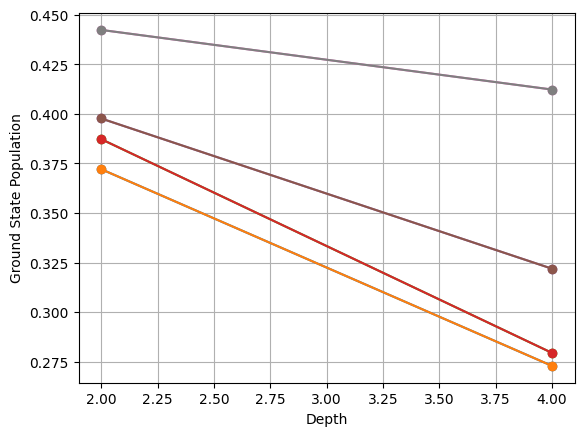

In [58]:
ax = plt.gca()
for i in range(evs_at_depth.shape[1]-260):
    ax.plot(depths, evs_at_depth[:,i],"o-")

ax.set_ylabel("Ground State Population")
ax.set_xlabel("Depth")
ax.grid()

In [59]:
import lmfit
model= lmfit.models.ExpressionModel(
            expr="a * alpha ** x + b",
            name="rb_decay")

params_dict = {
    'a': {'value': 1.0,
            'min': -1.0,
            'max': 1.0,
            },
    'b': {'value': 0.0, 
            'min': -1.0,
            'max': 1.0,
            },
    'alpha': {'value': 0.9, 
              'min': 0.0,
              'max': 1.0
              },
}
p = model.make_params(**params_dict)